# The Prediction for Survival of People in Titanic 

### Done By - VISHWAK BALAJI

**PROBLEM:**
In this Problem I have been working with "Titanic Data Set from Kaggle". Also, I have been trying to predict a classification on Survival or Deceased.

**OBJECTIVE:**
Using Logistic Regression in Titanic dataset, I am trying to predict the Classification on survival or deceased. For that first in EDA, I checked the Missing Data, plotting the other columns and solve the issue of it. Then in same EDA, Cleaning the data. Converting the categorical features using dummies then, built a logistics regression model and do model testing.   

**VARIABLE DESCRIPTION:**

Pclass     :Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Survival   :Survival (0 = No; 1 = Yes)

Name       :Name

Sex        :Sex

Age        :Age

SibSp      :Number of Siblings/Spouses Aboard

Parch      :Number of Parents/Children Aboard

Ticket     :Ticket Number

Fare       :Passenger Fare (British pound)

Cabin      :Cabin

Embarked   :Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Importing Libraries
Let's import some packages to startwith

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Data
Let's start reading the titanic_train_csv file into pandas dataframe

In [2]:
titanic = pd.read_csv(r"C:\Users\vishw\Videos\DATA SETS\titanic data set\titanic_train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

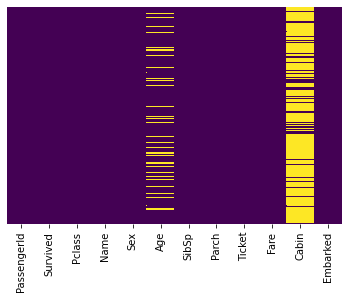

In [3]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of Age data are missing. The proportion of Age missing is small enough to replace with some form of missing imputation. Looking at the Cabin column, we are just missing to much of the data to do something in basic level. We will probably drop this later or change it in to some other feature like "Cabin Known: 1 to 0".

Let's continue on by visualizing some more of the data!

<AxesSubplot:xlabel='Survived', ylabel='count'>

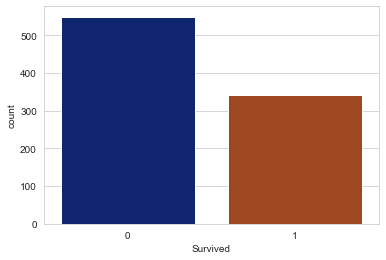

In [4]:
# Count plot for Survied (yes[1] or no[0])
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic,palette='dark')

<AxesSubplot:xlabel='Survived', ylabel='count'>

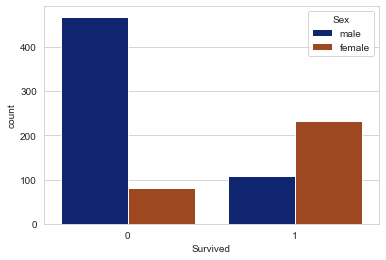

In [5]:
# Count plot for Survived depends on Sex
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='dark')

<AxesSubplot:xlabel='Survived', ylabel='count'>

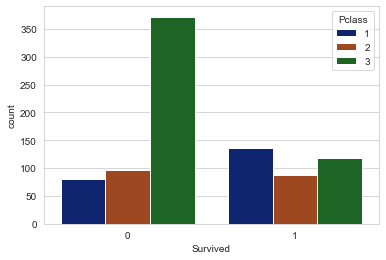

In [6]:
# Count plot for Survied depends on the Pclass
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='dark')

<AxesSubplot:>

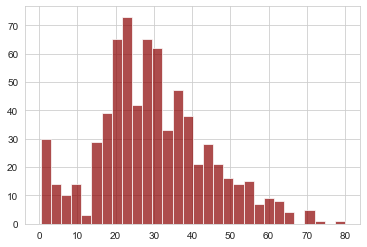

In [7]:
# histogram plot for Age (with Nan)
titanic['Age'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

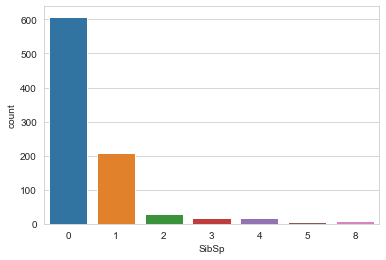

In [8]:
# count plot for SibSp (sibiling / spouse)
sns.countplot(x='SibSp',data=titanic)

In [9]:
# using diffrent plotting package to intract with Fare column through histogram
import cufflinks as cf
cf.go_offline() # this makes it work in offline too

In [10]:
titanic['Fare'].iplot(kind='hist',bins=30,color='green')

## Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class.


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

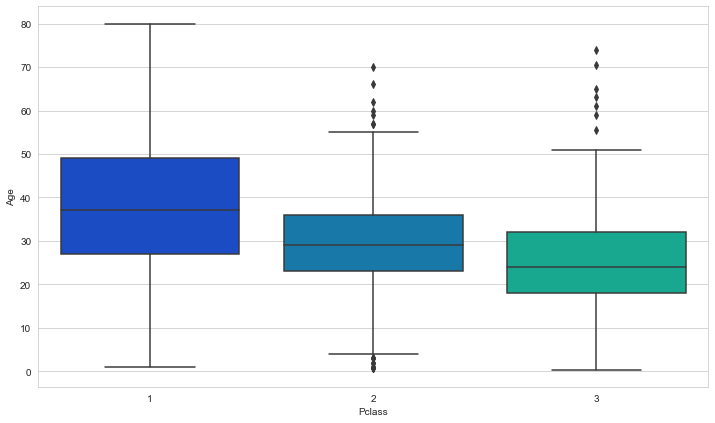

In [11]:
# Boxplot for Age depends on Pclass
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [13]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

<AxesSubplot:>

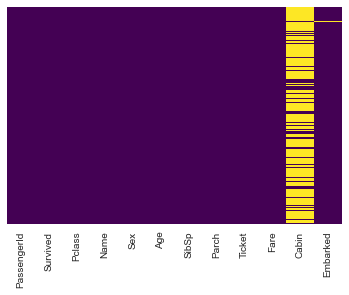

In [14]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [15]:
titanic.drop('Cabin',axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
titanic.head().dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [18]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [19]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [20]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set.

## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                    titanic['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lor = LogisticRegression()
lor.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [26]:
y_pred = lor.predict(X_test)
print(y_pred)

[0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1]


Let's move on to evaluate our model!

# Evaluation

### Forming a Classification report

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       154
           1       0.78      0.63      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268



In [28]:
# Used to see the overall confustion  matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("The Confusion Matrix value is\n",cm)

# Used to see the overall accuracy score:
from sklearn.metrics import accuracy_score
As = accuracy_score(y_test, y_pred)
print("The Accuracy Score Value is",As)

The Confusion Matrix value is
 [[134  20]
 [ 42  72]]
The Accuracy Score Value is 0.7686567164179104


### The Accuracy Value for Logistic regression is 0.7686567164179104